**РК №1. Сыса Павел Валерьевич, ИУ5-65Б. Вариант №11: задача №2, набор данных №3.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

Подключение и исследование набора данных

In [2]:
df = pd.read_csv('toy_dataset.csv')

In [3]:
df.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
df.shape

(150000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0       Number  150000 non-null  int64  
 1   City        150000 non-null  object 
 2   Gender      150000 non-null  object 
 3   Age         150000 non-null  int64  
 4   Income      150000 non-null  float64
 5   Illness     150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


Вычисление пропусков по столбцам

In [6]:
df.isna().sum()

    Number    0
City          0
Gender        0
Age           0
Income        0
Illness       0
dtype: int64

В качестве категориального признака был выбран столбец "Illness", количественный признак - столбец "Age".
Изначально пропуски в данных отсутствовали, поэтому они были созданы искусственно. Количество пропущенных значений приблизительно равно 20 процентам от общего числа значений

In [7]:
df['Age'] = df['Age'].map(lambda x: np.nan if random.uniform(0, 1) < 0.2 else x)
df['Illness'] = df['Illness'].map(lambda x: np.nan if random.uniform(0, 1) < 0.2 else x)

df.isna().sum()

    Number        0
City              0
Gender            0
Age           29855
Income            0
Illness       30145
dtype: int64

Полученные пропуски в столбце "Age" были заменены средним значением по данному столбцу.
Среднее значение было получено с помощью mean

In [8]:
age_mean = np.mean(df['Age'])
df['Age'] = df['Age'].apply(lambda x: age_mean if np.isnan(x) else x)

df.isna().sum()

    Number        0
City              0
Gender            0
Age               0
Income            0
Illness       30145
dtype: int64

Полученные пропуски в столбце "Illness" были заменены наиболее часто встречающимся значением по данному столбцу.
Наиболее часто встречающееся значение было получено с помощью mode

In [9]:
illness_new = df['Illness'].mode()
df['Illness'] = df['Illness'].apply(lambda x: illness_new if pd.isnull(x) else x)

df.isna().sum()

    Number    0
City          0
Gender        0
Age           0
Income        0
Illness       0
dtype: int64

Пропуски были обработаны

Построение парных диаграмм. Так как в наборе данных 150000 записей, построение было выполнено для всех данных, а также для выборки, состоящей из случайных 1000 элементов, чтобы диаграммы были более информативны 

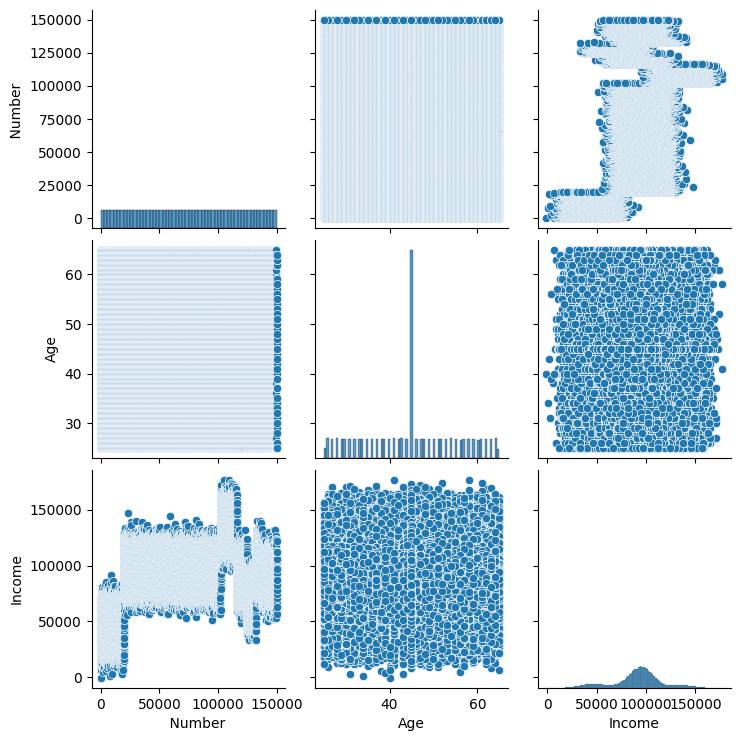

In [10]:
sns.pairplot(df, kind='scatter')

Случайная выборка из 1000 элементов была получена с помощью sample

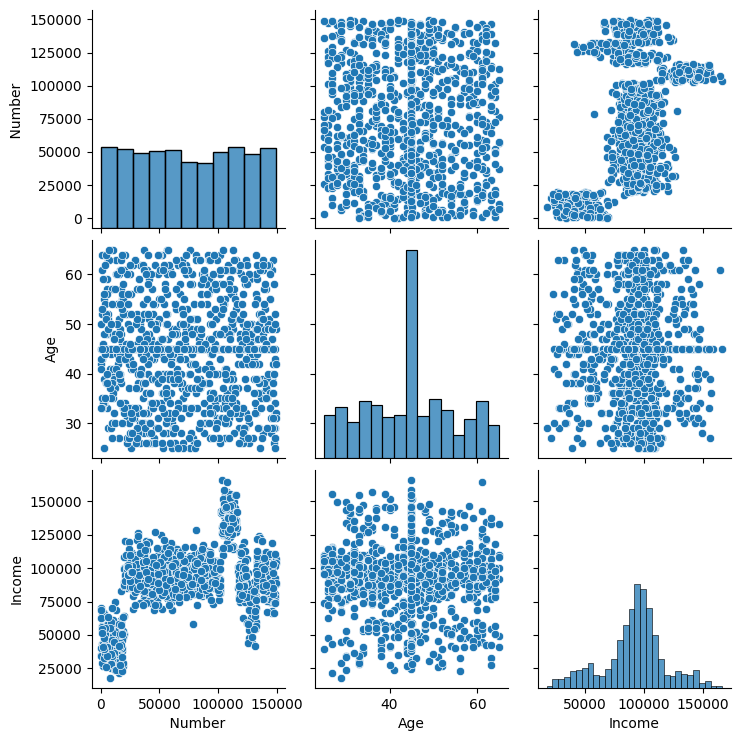

In [11]:
df = df.sample(n=1000)
sns.pairplot(df, kind='scatter')

Столбец "Number", содержащий номера записей, не является ценным для дальнейшего построения модели, остальные столбцы могут быть использованы.